In [32]:
import seaborn as sns

# retrieve sample dataset from seaborn package
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [33]:
# load 'tips' dataset
tips = sns.load_dataset("tips")

# print tips shape & head
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
import pandas as pd

# one-hot encoding columns
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [35]:
# preprocessing dataset
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
print(tips.shape)
tips.head()

X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(244, 13)
(244, 12) (244,)
(195, 12) (195,)
(49, 12) (49,)


In [36]:
# prepare W, b vector
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

In [37]:
# model function
# sklearn
# model = LinearRegression()
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i]* W[i]
    predictions += b
    return predictions

In [38]:
# loss function - MSE
def MSE(a, b):
    return ((a - b) ** 2).mean()

def loss(X, W, b, y):
    predictions = model(X, W, b)
    return MSE(y, predictions)

In [39]:
# gradient
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 2/N * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [40]:
dW, db = gradient(X, W, b, y)
print("dW:", dW, "dW shpae: ", dW.shape)
print("db:", db, "db shpae: ", db.shape)

dW: [586.42860439  70.82397614  17.02425923   8.40252161  10.18205505
  15.24472578   5.69009307   1.80176574   9.49653341   8.43838861
   6.13639169  19.29038914] dW shpae:  (12,)
db: 25.42678083133037 db shpae:  ()


In [41]:
LEARNING_RATE = 0.0001
losses = []

# training
# model.fit( , )
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 25.1756
Iteration 20 : Loss 4.7963
Iteration 30 : Loss 2.2555
Iteration 40 : Loss 1.9371
Iteration 50 : Loss 1.8957
Iteration 60 : Loss 1.8888
Iteration 70 : Loss 1.8861
Iteration 80 : Loss 1.8841
Iteration 90 : Loss 1.8821
Iteration 100 : Loss 1.8801
Iteration 110 : Loss 1.8781
Iteration 120 : Loss 1.8761
Iteration 130 : Loss 1.8742
Iteration 140 : Loss 1.8722
Iteration 150 : Loss 1.8702
Iteration 160 : Loss 1.8683
Iteration 170 : Loss 1.8664
Iteration 180 : Loss 1.8644
Iteration 190 : Loss 1.8625
Iteration 200 : Loss 1.8606
Iteration 210 : Loss 1.8587
Iteration 220 : Loss 1.8568
Iteration 230 : Loss 1.8549
Iteration 240 : Loss 1.8530
Iteration 250 : Loss 1.8511
Iteration 260 : Loss 1.8492
Iteration 270 : Loss 1.8473
Iteration 280 : Loss 1.8455
Iteration 290 : Loss 1.8436
Iteration 300 : Loss 1.8417
Iteration 310 : Loss 1.8399
Iteration 320 : Loss 1.8381
Iteration 330 : Loss 1.8362
Iteration 340 : Loss 1.8344
Iteration 350 : Loss 1.8326
Iteration 360 : Loss 1.8308


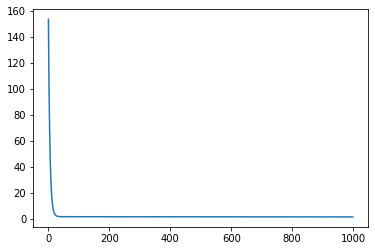

In [42]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [43]:
# Apply model using test dataset

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

1.3358763626825927

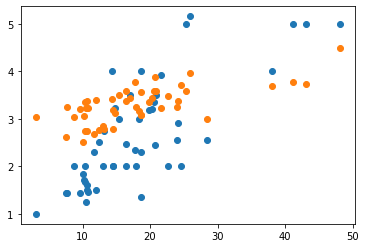

In [44]:
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], prediction, label='pred')
plt.show()